In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re
import netCDF4 as nc

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *

from gridtools.solps_python_scripts.read_b2fgmtry import *


%load_ext autoreload
%autoreload 2
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


In [2]:
path=os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19")

### Isolate SOLPS extents
- Keep the plot please... the index of the upper target was found manually

No duplicates found


(-0.9, 0.9)

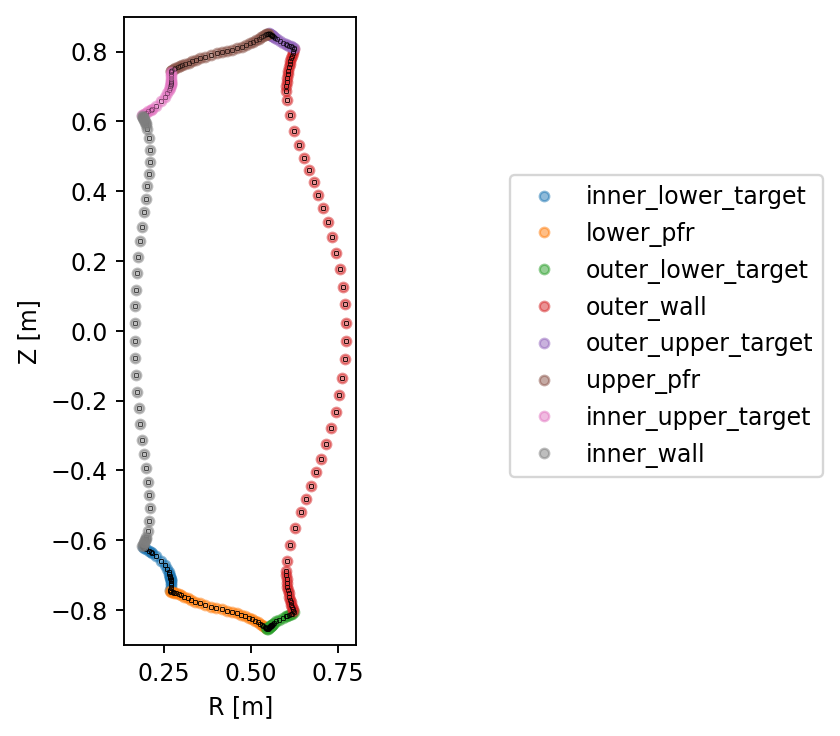

In [5]:
plt.close("all")
wfluxes = dict()
df = wfluxes_all.copy()
# wfluxes["all"] = wfluxes_all.copy()
wfluxes["inner_lower_target"] = df.iloc[slice(22,44),:]
wfluxes["lower_pfr"] = df.iloc[slice(44,74),:]
wfluxes["outer_lower_target"] = df.iloc[slice(74,97),:]
wfluxes["outer_wall"] = df.iloc[slice(97,156),:]
wfluxes["outer_upper_target"] = df.iloc[slice(156,176),:]
wfluxes["upper_pfr"] = df.iloc[slice(176,209),:]
wfluxes["inner_upper_target"] = df.iloc[slice(209,231),:]
wfluxes["inner_wall"] = df.iloc[np.r_[slice(0,22), slice(231,253)],:]


fig, ax = plt.subplots(dpi = 170)

for region in wfluxes.keys():

    ax.plot(df["R"], df["Z"], c = "k", alpha = 1, lw = 0, marker = "o", markersize = 2, markeredgewidth=0.1, markerfacecolor="None")
    if region != "wall":
        ax.plot(wfluxes[region]["R"], wfluxes[region]["Z"],  alpha = 0.5, lw = 0,  label = region, markersize = 4, marker = "o")
           
# for i, name in enumerate(rz_extents.keys()):
#     label = "SOLPS target boundary" if i == 0 else ""
#     ax.scatter(rz_extents[name]["R"], rz_extents[name]["Z"], marker = "x", c = "deeppink", label = label, zorder = 100)
    
# Plot duplicates if any
allregions = pd.concat(wfluxes.values())
dupl = allregions[allregions.duplicated(subset="R")]
if len(dupl) > 0:
    ax.scatter(dupl["R"], dupl["Z"], c = "r", edgecolors="yellow", s = 50, label = "DUPLICATES", zorder = 200)
else:
    print("No duplicates found")
    
ax.set_aspect("equal")
fig.legend(loc="upper left", bbox_to_anchor=(0.75, 0.7))
ax.set_xlabel("R [m]")
ax.set_ylabel("Z [m]")
ax.set_ylim(-0.9, 0.9)

Text(0.5, 1.0, 'E_Total')

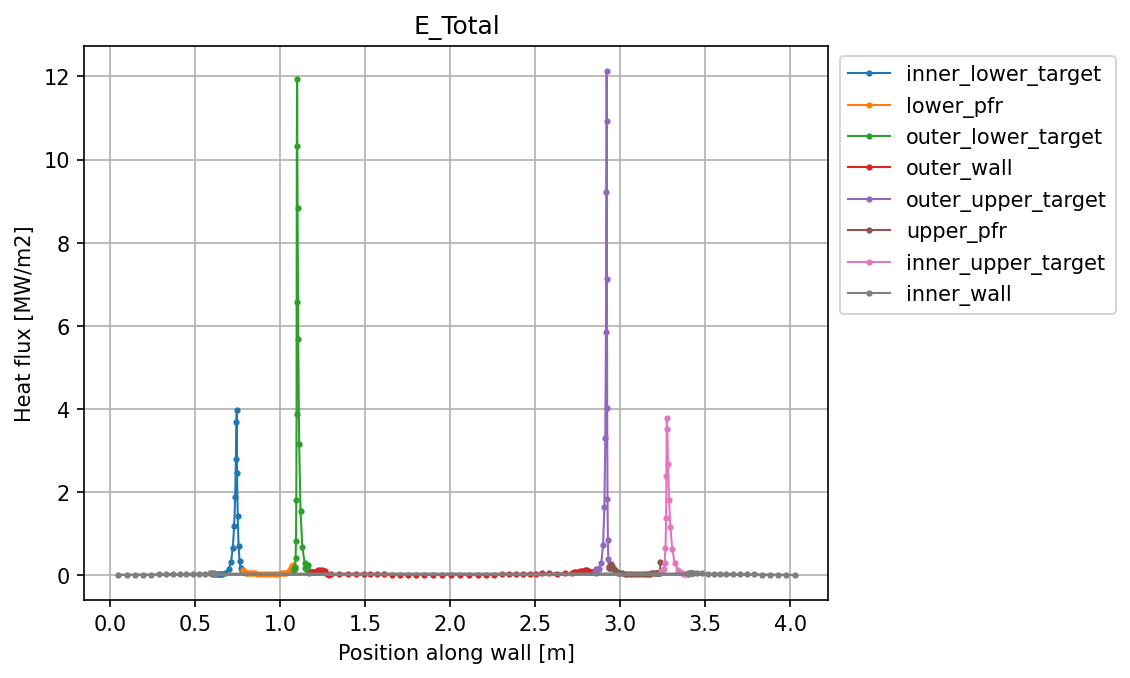

In [47]:
%matplotlib inline
fig, ax = plt.subplots(dpi = 150)
# param = "E_incident_Atoms"
param = "E_Total"
for region in wfluxes.keys():
    ax.plot(wfluxes[region]["dlWall"], wfluxes[region][param]*1e-6, label = region, marker = "o", lw = 1, markersize = 2)
    
ax.legend(loc="upper right", bbox_to_anchor=(1.4,1))
ax.grid()

ax.set_xlabel("Position along wall [m]")
ax.set_yscale("linear")
ax.set_ylabel("Heat flux [MW/m2]")
ax.set_title(param)
# ax.set_xlim(3.6,3.7)

# Read incidence angles

In [10]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [43]:
with open(os.path.join(path, "soledge2D.incidence_angles"), "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    lines[i] = line.replace("\n","")
    lines[i] = line.split()

angles = pd.DataFrame(lines)

for col in angles.columns:
    angles[col] = angles[col].astype(float)
    
angles = angles.rename(columns = {0:"L"})

In [60]:
angles

,L,1,2,3,4,5,6,7,8
0,0.049309,-0.177320,1.0,1.4167,0.0,0.0,34.982,0.0,2211.0
1,0.098600,0.062773,1.0,1.4162,0.0,0.0,35.067,0.0,2283.0
2,0.147630,-0.088550,1.0,1.4241,0.0,0.0,35.610,0.0,2500.0
3,0.196080,0.111990,1.0,1.4414,0.0,0.0,36.144,0.0,2579.0
4,0.242120,-0.079582,1.0,1.4667,0.0,0.0,36.862,0.0,2883.0
...,...,...,...,...,...,...,...,...,...
248,3.833100,-0.035526,1.0,1.4814,0.0,0.0,36.016,0.0,2732.0
249,3.880400,-0.278240,1.0,1.4540,0.0,0.0,35.487,0.0,2600.0
250,3.928600,-0.059132,1.0,1.4332,0.0,0.0,35.887,0.0,2329.0
251,3.977300,-0.290640,1.0,1.4209,0.0,0.0,35.399,0.0,2294.0


In [67]:
wfluxes[region].keys()

Index(['iTri', 'iSide', 'iProp', 'dlSurf', 'dlWall', 'Area', 'R', 'Z',
       'F_Ion_Incident', 'F_Atom_Emitted_from_Ion', 'F_Atom_Incident',
       'F_Mol_Incident', 'F_Mol_Emitted_from_Ion', 'F_Atom_Emitted_from_Atom',
       'F_Mol_Emitted_from_Atom', 'E_incident_Electron', 'E_incident_Ions',
       'E_Total', 'E_incident_Atoms', 'E_Radiation_Atoms',
       'E_Rad_Recombination', 'E_Recombination_in_Wall',
       'E_incident_Molecules', 'E_incident_Ions_EIRENE', 'E_Radiation'],
      dtype='object')

Text(0.5, 1.0, 'E_incident_Atoms along with data from column 4')

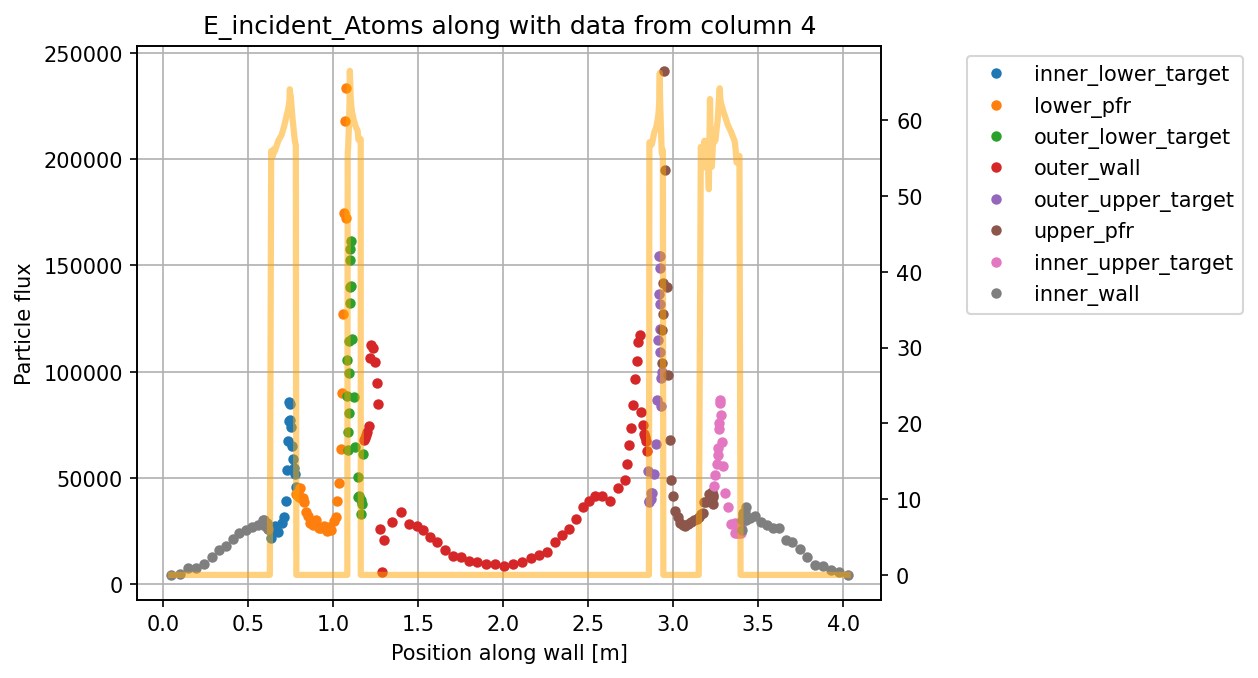

In [86]:


fig, ax = plt.subplots(dpi = 150)
# param = "E_incident_Atoms"
param = "E_incident_Atoms"
# param = "F_Ion_Incident"
colid = 4

for region in wfluxes.keys():
    ax.plot(wfluxes[region]["dlWall"], wfluxes[region][param], label = region, marker = "o", lw = 0, markersize = 4)
    
ax2 = ax.twinx()
ax2.plot(angles["L"], angles[colid], lw = 3, c = "orange", alpha = 0.5)

ax.legend(loc="upper right", bbox_to_anchor=(1.5,1))
ax.grid()

ax.set_xlabel("Position along wall [m]")
ax.set_yscale("linear")
ax.set_ylabel("Particle flux")
ax.set_title(f"{param} along with data from column {colid}")
# ax.set_xlim(3.6,3.7)

<Axes: >

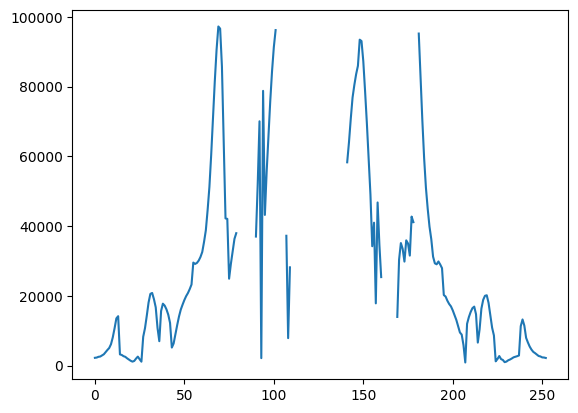

In [82]:
[print(x) for]